In [1]:
import os
os.chdir('../..')
os.getcwd()

'C:\\Users\\fim19\\MY_FILES\\studying\\MIPT\\masters_paper\\work_with_data\\code'

In [2]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nilmtk
from nilmtk import DataSet, MeterGroup
import itertools
import operator

In [2]:
DAY_IN_SEC = 60*60*24
MONTH_IN_SEC = 30*DAY_IN_SEC

In [3]:
# from convert_ideal import convert_ideal
# convert_ideal('./ideal_dataset', './ideal.h5')

In [4]:
from contextlib import contextmanager
import time

@contextmanager
def time_measure(name):
    start_time = time.time()
    yield
    elapsed_time = time.time() - start_time
    minutes = int(elapsed_time // 60)
    print(f'[{name}] finished in {minutes}m {elapsed_time % 60:.2f}s')

In [14]:
ideal = DataSet('./ideal.h5')
keys = sorted(ideal.buildings.keys())
print(ideal.buildings.keys())
print(keys)

odict_keys([105, 106, 128, 136, 139, 140, 145, 146, 162, 168, 169, 171, 175, 208, 212, 225, 227, 228, 231, 238, 242, 249, 255, 259, 262, 263, 264, 266, 268, 276, 311, 328, 61, 62, 63, 65, 73, 90, 96])
[61, 62, 63, 65, 73, 90, 96, 105, 106, 128, 136, 139, 140, 145, 146, 162, 168, 169, 171, 175, 208, 212, 225, 227, 228, 231, 238, 242, 249, 255, 259, 262, 263, 264, 266, 268, 276, 311, 328]


In [6]:
elec0 = ideal.buildings[keys[0]].elec
data0 = elec0.mains().power_series_all_data()
data0.head()

2016-10-06 13:30:37+01:00      0
2016-10-06 13:30:38+01:00    247
2016-10-06 13:30:39+01:00    247
2016-10-06 13:30:40+01:00    247
2016-10-06 13:30:41+01:00    247
Name: (power, apparent), dtype: int64

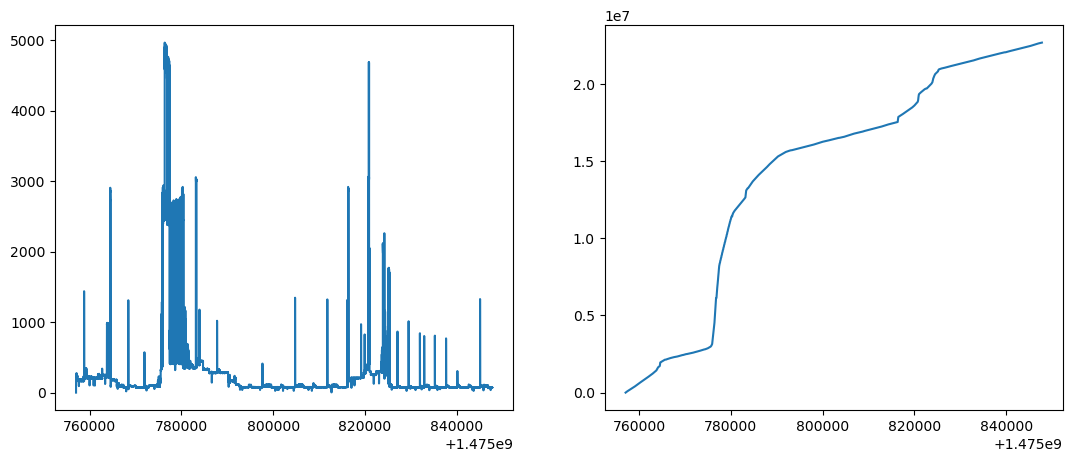

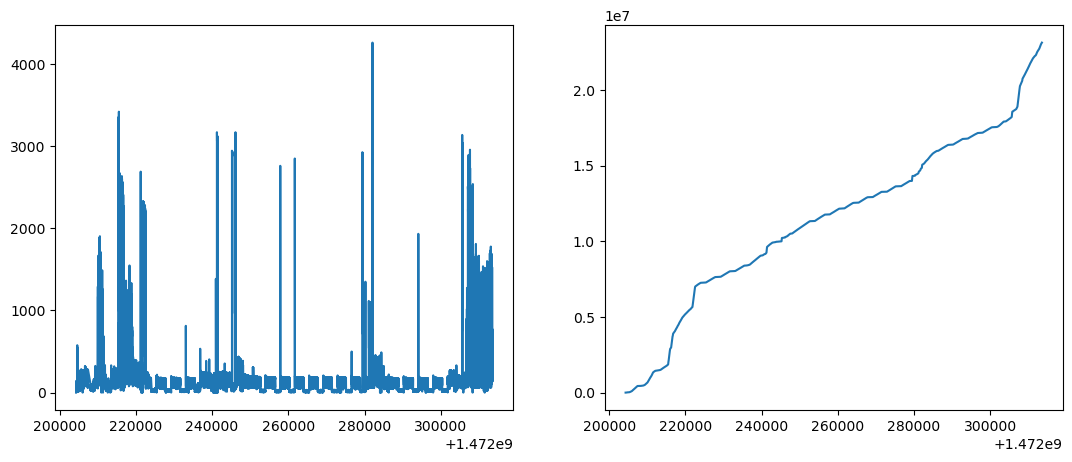

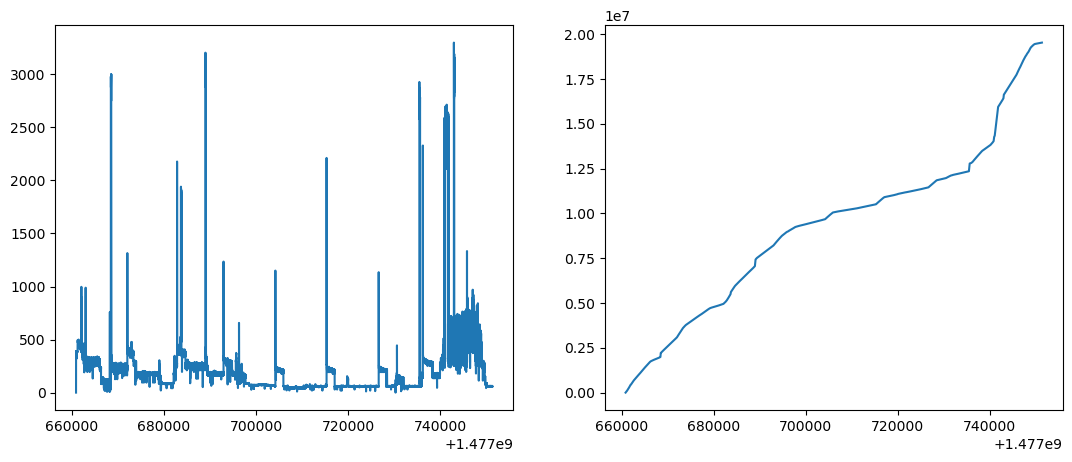

In [7]:
def plot_supply(int_dates, values, duration):
    accumulated = list(itertools.accumulate(values[:duration], operator.add))
#     summ = accumulated[-1] / 1000 / 3600 * 30
#     print(summ)
    fig, axs = plt.subplots(1, 2, figsize=(13, 5))
    axs[0].plot(int_dates[:duration], values[:duration])
    axs[1].plot(int_dates[:duration], accumulated)


day = 60*60*24
for i in range(3):
    elec = ideal.buildings[keys[i]].elec
    data = elec.mains().power_series_all_data()
    int_dates = data.index.astype(np.int64) // 10**9
    values = data.values
    plot_supply(int_dates, values, day)

In [8]:
# from collections import Counter

# def print_skip_lengths(int_dates):
#     print(Counter(
#         int_dates[i] - int_dates[i-1]
#         for i in range(1, len(int_dates))
#     ))


# for i in range(3):
#     elec = ideal.buildings[keys[i]].elec
#     data = elec.mains().power_series_all_data()
#     int_dates = data.index.astype(np.int64) // 10**9
#     values = data.values
#     print_skip_lengths(int_dates)

In [9]:
# from collections import Counter

# def print_skip_lengths(int_dates):
#     print(max(
#         int_dates[i] - int_dates[i-1]
#         for i in range(1, len(int_dates))
#     ))


# for i in range(3):
#     elec = ideal.buildings[keys[i]].elec
#     data = elec.mains().power_series_all_data()
#     int_dates = data.index.astype(np.int64) // 10**9
#     values = data.values
#     print_skip_lengths(int_dates)

In [10]:
def get_stable_periods(int_dates, duration=MONTH_IN_SEC, max_gap=5):
    stable_period_start_indexes = [0]
    stable_period_end_indexes = []
    deltas = [0] + [
        int_dates[i] - int_dates[i-1]
        for i in range(1, len(int_dates))
    ]
    
    interval_lens = [1] * len(int_dates)
    for i in range(len(int_dates)):
        if interval_lens[i-1] < duration:
            if deltas[i] <= max_gap:
                interval_lens[i] = interval_lens[i-1] + deltas[i]
            else:
                stable_period_start_indexes.pop()
                stable_period_start_indexes.append(i)
        else:
            stable_period_start_indexes.append(i)
            stable_period_end_indexes.append(i)
            
    return stable_period_start_indexes, stable_period_end_indexes

In [17]:
with time_measure('finding stable days'):
    for i in range(1):
        elec = ideal.buildings[keys[i]].elec
        data = elec.mains().power_series_all_data()
        int_dates = data.index.astype(np.int64) // 10**9
        periods = get_stable_periods(int_dates, duration=DAY_IN_SEC, max_gap=10)
        print(len(periods[1]))

125
[finding stable days] finished in 1m 44.98s


In [20]:
284252 /60/60/24

3.289953703703704

In [13]:
60*60*24*30

2592000

In [15]:
print(data0.count())
print(data0.count()*2)
print(len(data0.values))
print(len(data0.index.astype(np.int64)))
print(type(data0))

28330424
56660848
28330424
28330424
<class 'pandas.core.series.Series'>


284252 369622


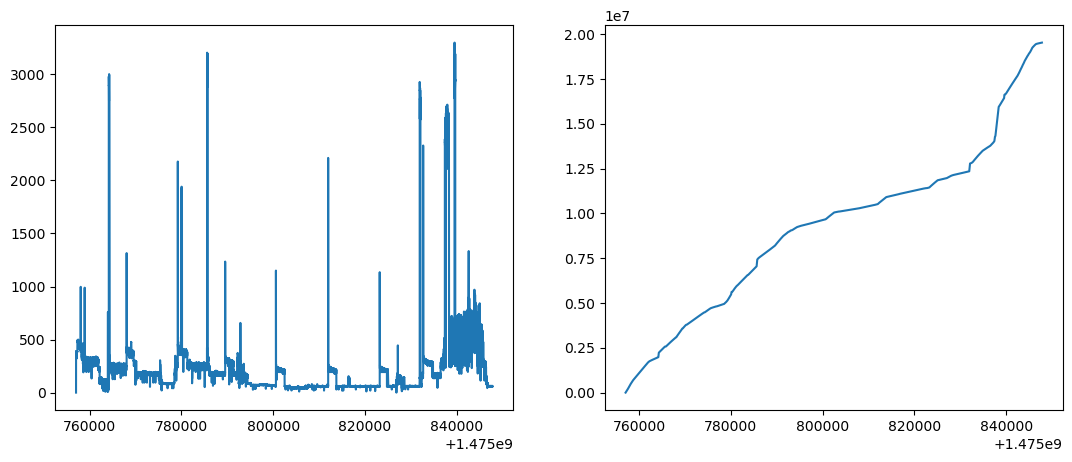

In [19]:
print(periods[0][0], periods[1][0])
clear_dates = data0.index.astype(np.int64)[periods[0][0]:periods[1][0]]
clear_values = data0.values[periods[0][0]:periods[1][0]]

plot_supply(int_dates, values, day)

In [21]:
data0[periods[0][0]:periods[1][0]]

2016-10-10 02:05:49+01:00     72
2016-10-10 02:05:50+01:00     75
2016-10-10 02:05:51+01:00     73
2016-10-10 02:05:52+01:00     73
2016-10-10 02:05:53+01:00     73
                            ... 
2016-10-11 02:05:44+01:00    102
2016-10-11 02:05:45+01:00     99
2016-10-11 02:05:46+01:00     99
2016-10-11 02:05:47+01:00     99
2016-10-11 02:05:48+01:00     99
Name: (power, apparent), Length: 85370, dtype: int64

In [25]:
data0[:5]

2016-10-06 13:30:37+01:00      0
2016-10-06 13:30:38+01:00    247
2016-10-06 13:30:39+01:00    247
2016-10-06 13:30:40+01:00    247
2016-10-06 13:30:41+01:00    247
Name: (power, apparent), dtype: int64

In [3]:
import os
os.chdir('../..')
os.getcwd()

'C:\\Users\\fim19\\MY_FILES\\studying\\MIPT\\masters_paper\\work_with_data\\code'

In [4]:
from utils.constants import DatasetType, DAY_IN_SEC